<a href="https://colab.research.google.com/github/lu-danilo/Arq/blob/main/Dados_Cdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de retorno do CDI através do python pegando dados direto do banco central criando uma calculadora de retorno desde 1994 e avaliando janelas de retorno

In [ ]:
pip install requests pandas matplotlib

        data     valor     fator  retorno_acumulado
0 1994-01-03  1.670333  1.000066           1.000066
1 1994-01-04  1.670333  1.000066           1.000131
2 1994-01-05  1.670000  1.000066           1.000197
3 1994-01-06  1.669667  1.000066           1.000263
4 1994-01-07  1.669333  1.000066           1.000329


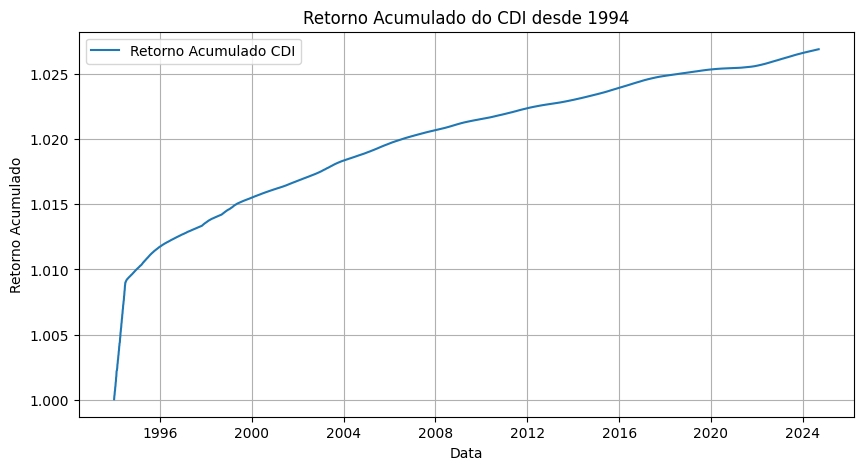

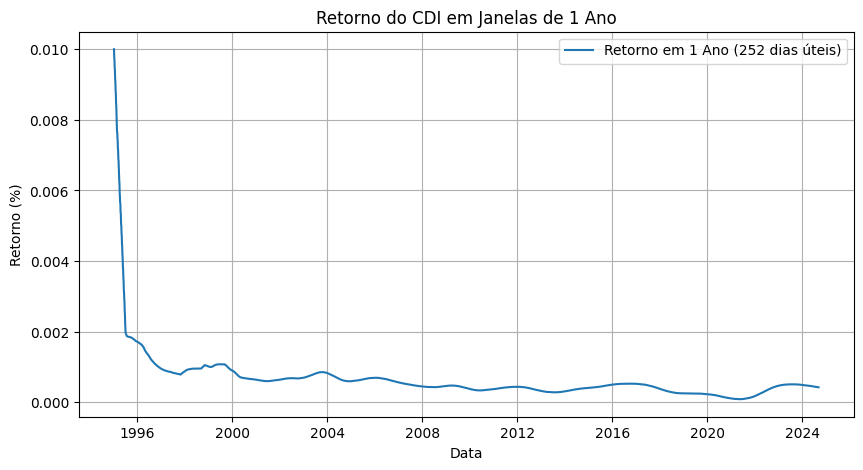

In [ ]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Função para obter dados do CDI através da API do Banco Central (SGS)
def get_cdi_data():
    url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.12/dados?formato=json&dataInicial=01/01/1994&dataFinal=31/12/2024'
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data)

# Função para calcular o retorno acumulado do CDI
def calcular_retorno_acumulado(df):
    df['valor'] = pd.to_numeric(df['valor'])
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')

    # Converter o CDI diário em fator de multiplicação
    df['fator'] = (1 + df['valor'] / 100) ** (1/252)  # CDI é uma taxa anual, assumimos 252 dias úteis

    # Calcular retorno acumulado
    df['retorno_acumulado'] = df['fator'].cumprod()

    return df

# Função para calcular retorno em diferentes janelas
def calcular_retorno_janelas(df, dias):
    df['retorno_janela'] = df['retorno_acumulado'].pct_change(periods=dias)
    return df

# Função principal para executar a análise
def analise_cdi():
    # Obter dados
    df = get_cdi_data()

    # Calcular retorno acumulado
    df = calcular_retorno_acumulado(df)

    # Exibir os primeiros dados
    print(df.head())

    # Calcular retorno em janelas de 1 ano (252 dias úteis)
    df = calcular_retorno_janelas(df, 252)

    # Visualização dos retornos acumulados
    plt.figure(figsize=(10, 5))
    plt.plot(df['data'], df['retorno_acumulado'], label='Retorno Acumulado CDI')
    plt.title('Retorno Acumulado do CDI desde 1994')
    plt.xlabel('Data')
    plt.ylabel('Retorno Acumulado')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Visualizar o retorno em janelas de 1 ano
    plt.figure(figsize=(10, 5))
    plt.plot(df['data'], df['retorno_janela'], label='Retorno em 1 Ano (252 dias úteis)')
    plt.title('Retorno do CDI em Janelas de 1 Ano')
    plt.xlabel('Data')
    plt.ylabel('Retorno (%)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Executar a análise
analise_cdi()